In [64]:
""" IOT INTRUSION DETECTION """

import csv
import numpy
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import Binarizer
from numpy import set_printoptions

''' Load data and create a dataframe '''

filename_train = 'train_imperson_without4n7_balanced_data.csv'

dfTrain = pd.read_csv(filename_train,
                header=0,
                na_values=['nan'])

In [65]:
''' View dataframe info '''

# 97,044 rows, 153 columns
# the class is the feature 155
print(dfTrain.head())
print(dfTrain.info())
print(dfTrain.describe())


   1  2  3         5         6         8         9  10  11  12  ...  146  147  \
0  0  0  0  0.000066  0.000066  0.009150  0.009150   0   0   0  ...  0.0    0   
1  0  0  0  0.000014  0.000014  0.000000  0.000000   0   0   0  ...  0.0    0   
2  0  0  0  0.035528  0.035528  0.070588  0.070588   0   0   0  ...  0.0    0   
3  0  0  0  0.005128  0.005128  0.094771  0.094771   0   0   0  ...  0.0    0   
4  0  0  0  0.035116  0.035116  0.070588  0.070588   0   0   0  ...  0.0    0   

   148  149  150  151  152  153  154  155  
0    0    0    0    0    0    0  0.0    0  
1    0    0    0    0    0    0  0.0    0  
2    0    0    0    0    0    0  0.0    0  
3    0    0    0    0    0    0  0.0    0  
4    0    0    0    0    0    0  0.0    0  

[5 rows x 153 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97044 entries, 0 to 97043
Columns: 153 entries, 1 to 155
dtypes: float64(48), int64(105)
memory usage: 113.3 MB
None
             1        2        3             5            

In [66]:
''' Delete columns with no values '''

# many features have no values
columnsToDelete = [] 

# if the  feature has std == 0 it means no values or only one value
for key, value in dfTrain.iteritems():
    if dfTrain[key].std() == 0:
        columnsToDelete.append(key)
        
dfTrain = dfTrain.drop(columnsToDelete, axis=1)
len(columnsToDelete) # 74 features have been deleted

# the features are now 79
# the observations are perfectly balanced: 50% class 0, 50% class 1 
class_counts = dfTrain.groupby('155').size()
print(class_counts)


155
0    48522
1    48522
dtype: int64


In [67]:
''' Sort features by correlation and create 4 smaller dataframe '''

# # sort the correlations from highest positive to highest negative and show the first 10
correlations = dfTrain.corr(method='pearson')
corr = correlations["155"].sort_values(ascending=False)
corr[0:10]

# The 78 columns are subdivided into 4 groups based on the correlation
# first 3 groups have 20 items + the class, the last one has 18 items + the class
Corr20 = ['71', '50', '68', '38', '73', '66', '140', '61', '142', '79', 
               '6', '5', '64', '80', '18', '20', '16', '26', '29', '43', '155']
Corr40 = ['89', '52', '15', '62', '14', '48', '111', '138', '133', '97', 
               '83', '105', '113', '88', '117', '84', '108', '86', '120', '78', '155']
Corr60 = ['119', '123', '144', '106', '72', '98', '90', '125', '118', '112', 
               '93', '109', '104', '121', '143', '76', '141', '128', '127', '129', '155']
Corr80 = ['130', '126', '107', '94', '122', '77', '110', '70', '75', '154', 
               '9', '8', '145', '146', '82', '47', '51', '67', '155']

# create 4 smaller dataframes
dfTrain20 = dfTrain[Corr20]
dfTrain40 = dfTrain[Corr40]
dfTrain60 = dfTrain[Corr60]
dfTrain80 = dfTrain[Corr80]


71      0.672478
50     -0.881052
68     -0.797523
38     -0.977053
73     -0.894060
66     -1.310025
140     0.535234
61     -2.572446
142     0.768811
79     34.229749
6      17.200153
5      17.200153
64     -1.357737
80     92.740886
18    -67.957971
20    -67.957971
16    -67.957971
26    -67.957971
29    -67.957971
43    -67.957971
155     0.000000
dtype: float64


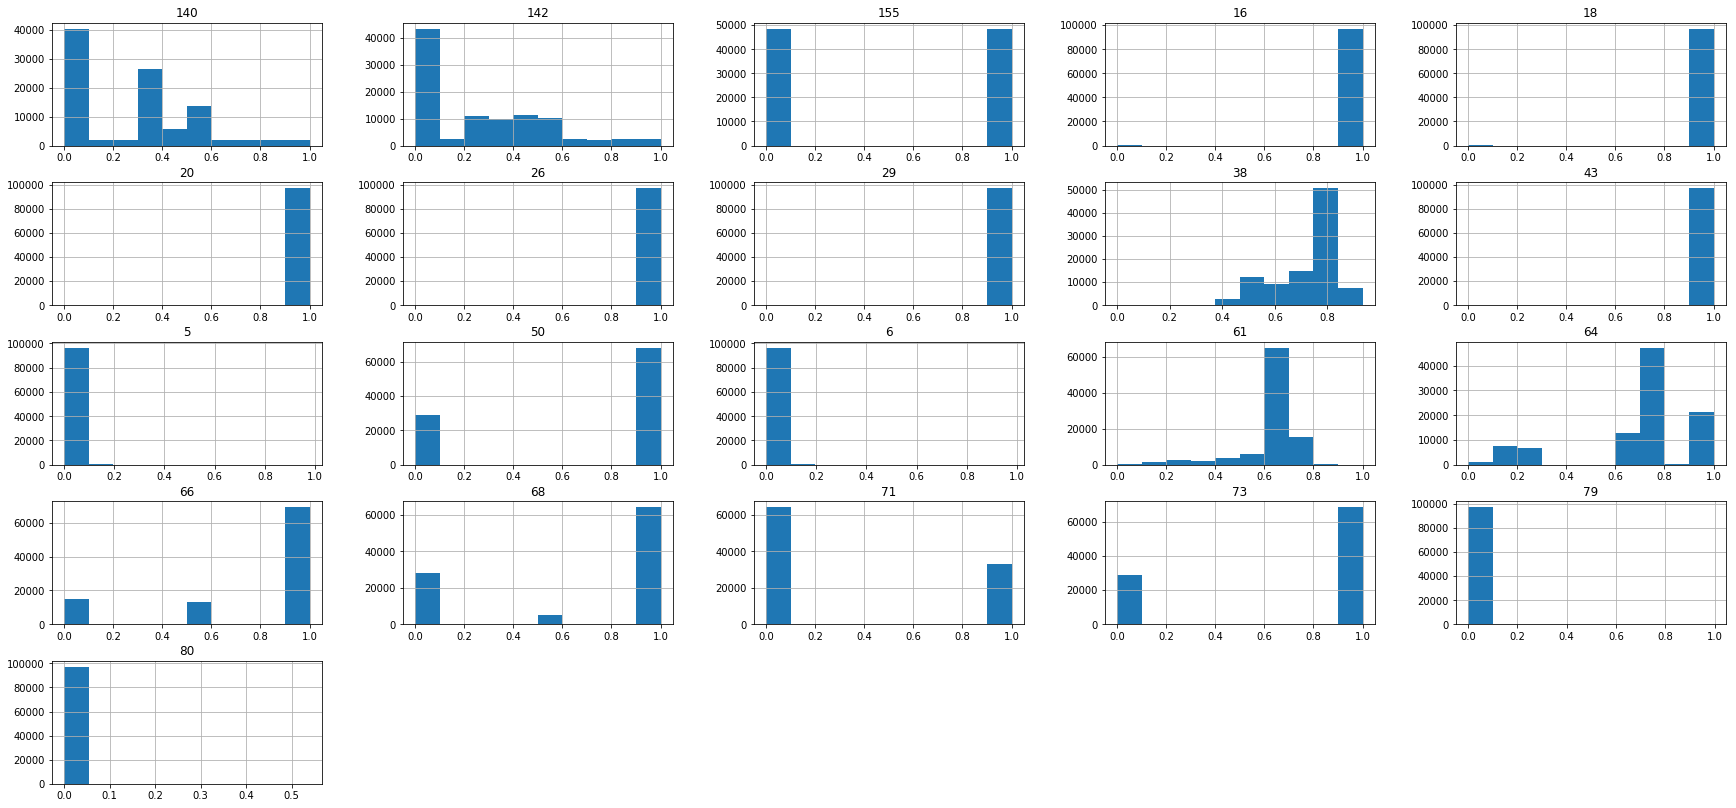

In [68]:
''' Analysis and plotting of the dataframe dfTrain20 '''

# the plots requiring a certain amount of time have been commented out
# skewness
skew = dfTrain20.skew()
print(skew)

# histogram plot
dfTrain20.hist(figsize=(30,14))
pyplot.show()

# density plot
# dfTrain20.plot(kind='density', subplots=True, layout=(5,5), sharex=False, figsize=(20,14))
# pyplot.show()

# Box and Whisker Plot
# dfTrain20.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(20,14))
# pyplot.show()

# Scatterplot Matrix
# commented out as it takes a lot to run

# from pandas.plotting import scatter_matrix
# scatter_matrix(dfTrain20, figsize=[20, 20])
# pyplot.show()


In [78]:
''' Binarise data '''
''' Standardisation, Normalisation and PowerTransformer have no effect on the normal form '''

# extract the values from the dataframe
array = dfTrain20.values
X = array[:, 0:20]
Y = array[:, 20] # the class does not need to be binarized

binarizer = Binarizer(threshold=0.5).fit(X)
binaryX = binarizer.transform(X)

# summarize transformed data
set_printoptions(precision=3)

# create a new dataframe with the binarized values
dfTrain20_binarized = pd.DataFrame(binaryX, columns=HiCorr20[0:20])

# add the class back to the binarized dataframe
dfTrain20_binarized.insert(20, '155', Y, True)
print(dfTrain20_binarized.head(10))

    71   50   68   38   73   66  140   61  142   79  ...    5   64   80   18  \
0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0  1.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0  1.0   
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
3  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
4  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
5  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
6  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
7  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
8  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
9  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   

    20   16   26   29   43  155  
0  1.0  1.0  1.0  1.0  1.0  0.0  
1  1.0  1.0  1.0  1.0  1.0  0.0  
2  1.0  1.0  1.0 